#### for now
#### candidate_num=5 has trained 4% training set
#### candidate_num=20 has trained 13.5% training set
#### candidate_num=100 has trained 75% training set

# Most recent results for baseline_wiki2021 
### candidate_num=5, exclude_cases_label_not_in_candidates

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates_canNUM20/10000/fg_eval.pkl")

fine_grained_evaluation.head()

,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
0,"[0.8690409660339355, 0.3772343695163727, 0.049...","[3.925407886505127, 3.460813522338867, 3.25164...",6,3.112252,3.143570,school,high,"[,, -, ., and, of, in, school, School, t...",1.022706
1,"[0.8554337620735168, 0.5099564790725708, 0.124...","[3.9586730003356934, 3.8421854972839355, 2.472...",1,1.867240,1.329419,.,mys,"[,, ., and, of, in, -, "", for, ), C, i, ur...",0.986879
2,"[1.1737343072891235, 0.7145400643348694, 0.757...","[3.292059898376465, 3.0082316398620605, 2.2704...",1,1.807656,1.618852,the,",","[ and, the, ,, in, a, which, ., of, he, ...",1.070449
3,"[1.1294779777526855, 0.13323982059955597, -0.3...","[7.045917510986328, 4.084017753601074, 3.94889...",0,0.839881,0.277878,ody,mys. The documentary was also awarded a 2010 Peab,"[ody, ock, erg, asket, ell, ian, en, ra, u, as...",0.529158
4,"[3.8485569953918457, 1.4692825078964233, 0.165...","[9.613874435424805, 6.756237506866455, 6.07760...",3,5.405655,3.877035,World,blacksmith's workshop.His company expanded in...,"[ the, his, a, World, this, its, which, ...",0.286912


In [27]:
fine_grained_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182729 entries, 0 to 182728
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   rerank_logits                 182729 non-null  object 
 1   normal_logits                 182729 non-null  object 
 2   ground_true_difficulty_level  182729 non-null  int64  
 3   rerank_loss                   182729 non-null  float64
 4   normal_loss                   182729 non-null  float64
 5   ground_true                   182729 non-null  object 
 6   inputs_text                   182729 non-null  object 
 7   candidate_tokens              182729 non-null  object 
 8   entropy_difficulty_level      182729 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 12.5+ MB


# visulization
### please help me add some other visulization if you want

<AxesSubplot:ylabel='Frequency'>

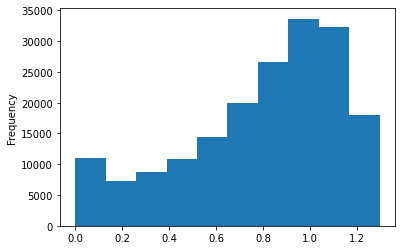

In [28]:
fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

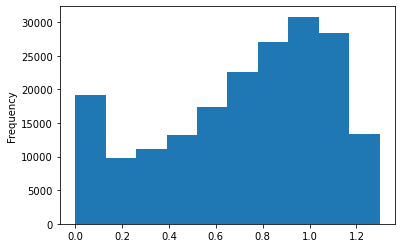

In [4]:
fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

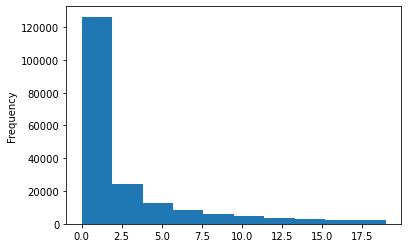

In [5]:
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')

Text(0, 0.5, 'rerank_loss')

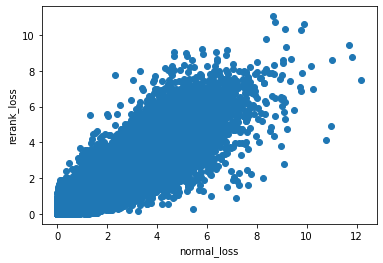

In [6]:
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")

Text(0, 0.5, 'entropy_difficulty_level')

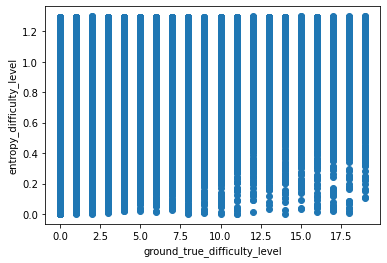

In [7]:
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")


### entropy_difficulty_level VS normal_loss
### entropy_difficulty_level VS rerank_loss

Text(0, 0.5, 'normal_loss')

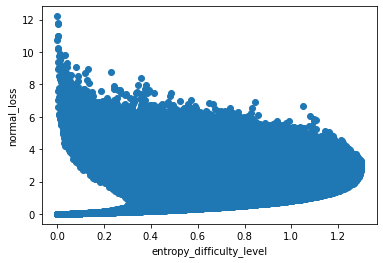

In [8]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

Text(0, 0.5, 'rerank_loss')

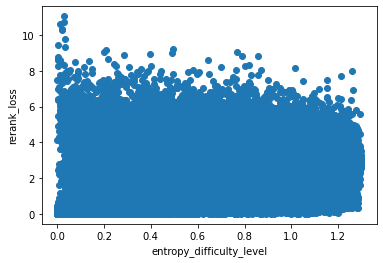

In [9]:
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

### so some important points for last two figures:

#### 1. if the entropy_difficulty_level is vely low (close to 0), which means gpt2 is very confident in these cases, actually it will make some stupid mistakes (some high normal loss). For these stupid mistakes, obviously reranker did better.

#### 2. if the entropy_difficulty_level is vely low, which means gpt2 is very confident in this cases, it did well at most of time (most of them are super-low normal loss). For these cases, seems reranker was not so great. We can see it exlargered some loss for these cases.

#### 3. The cases in 2 are much more than the cases in 1 (I showed it below). So I think original gpt2 did better during low entropy_difficulty_level.

#### 4. if the entropy_difficulty_level is vely high (close to 0.7), which means gpt2 feels ambigious for these cases, its normal_loss are usually around 1.5-2.5, while its rerank_loss are usually 0-4. So it exlargered some cases' loss, at the same time it decrease some other cases' loss. However, the second kind of cases are more than the first kind of cases. So I think reranker did better during large entropy_difficulty_level.

### very easy cases and very hard cases (maybe we name them gpt2 low/high confidence cases?)

In [12]:
very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.02]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.18]

In [13]:
print(very_easy_cases.shape)
very_easy_cases.head()

(7095, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
43,"[5.039735317230225, -1.4044318199157715, -0.86...","[14.835226058959961, 5.639411449432373, 4.9056...",0,0.014771,0.000512,s,mys. The documentary was also awarded a 2010 P...,"[s, es, and, is, ours, the, ers, its, ishes...",0.002511
67,"[5.282895088195801, 0.14357396960258484, -0.38...","[13.783285140991211, 6.674096584320068, 6.3952...",0,0.030663,0.003212,ion,mys. The documentary was also awarded a 2010 P...,"[ion, io, ions, ia, ian, iv, ry, ane, ri, i, o...",0.012581
78,"[5.795693874359131, -0.046553514897823334, -1....","[12.2200345993042, 3.587198257446289, 3.434809...",0,0.006793,0.001266,_,V) with negligible charge separation loss. Thi...,"[_, ., "", formula, for, of, ,, al, , by...",0.005701
108,"[5.459828853607178, 1.0626193284988403, 0.3673...","[15.234000205993652, 8.46792984008789, 7.88063...",9,4.746786,9.215069,),with temperature of kBCAr:kBCAr = (4 ± 2) cm3...,"[ ±, ×, x, vs, +, à, modify, &, oriented...",0.014615
164,"[6.974031925201416, 0.47864803671836853, -0.43...","[14.873376846313477, 9.183366775512695, 5.9862...",0,0.003099,0.004198,ter,1809.Whaling voyage #3 (1809–1811): Captain J...,"[ter, ters, ester, Ter, Ter, ster, omer, ater...",0.013654


In [14]:
print(very_hard_cases.shape)
very_hard_cases.head()

(11471, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
10,"[0.971206545829773, 0.45437145233154297, -0.43...","[4.726352214813232, 4.364029407501221, 3.99274...",10,3.438298,3.322377,got,"high school, back when I was part of a blues ...","[ moved, became, attended, took, started, ...",1.238225
77,"[0.1380370557308197, -0.7583845257759094, -1.4...","[3.807243824005127, 3.6888208389282227, 3.5644...",1,2.223027,2.412168,3,with temperature of kBCAr:kBCAr = (4 ± 2) cm,"[ (, 3, (, "", 2, ., ,, /, =, K, osity, -, !, ...",1.265217
100,"[2.1108474731445312, 0.7305971384048462, 0.197...","[4.678601264953613, 4.15900993347168, 4.106929...",1,2.511210,2.261900,stellar,". During the eclipse of the primary component,...","[ magnitude, stellar, mass, high, 0, temp...",1.201937
103,"[1.0048214197158813, -0.19026590883731842, 0.5...","[4.2105913162231445, 4.196794033050537, 4.0020...",2,1.885994,2.370006,=,with temperature of kBCAr:kBCAr = (4 ± 2) cm3...,"[1, ., =, -, 3, å, 2, is, ä, k, ud, z, �, ±...",1.223391
114,"[1.8064876794815063, 0.48850661516189575, -0.1...","[4.121791839599609, 3.8548312187194824, 3.8423...",2,2.964038,2.459386,appearance,"party of vocalist Chorão's own skatepark, apt...","[ band, group, appearance, of, team, star...",1.260750


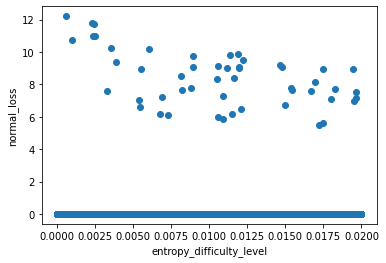

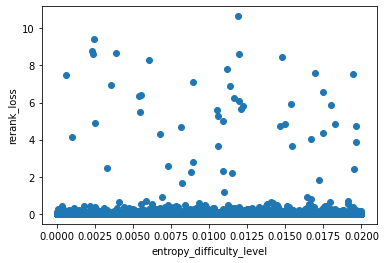

In [15]:
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()


plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

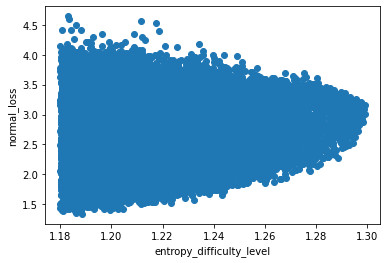

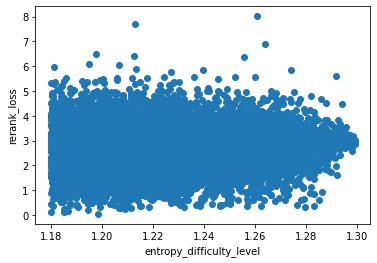

In [16]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

## Decile
#### find the decile (https://en.wikipedia.org/wiki/Decile) on the entropy difficulty and average the loss within each of 10 bins and compare the 10 average losses of the 1st stage prediction and 2nd stage prediction

In [17]:
import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.19117559060043293
avg rerank_loss: 0.19076787730924702

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 0.6830301660901265
avg rerank_loss: 0.6820478771286439

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 1.138820885718224
avg rerank_loss: 1.1381416353176925

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 1.464143153188104
avg rerank_loss: 1.450066388008233

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 1.711141864158498
avg rerank_loss: 1.69132836920898

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 1.9215872671962446
avg rerank_loss: 1.8965008069903662

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 2.1190433513381635
avg rerank_loss: 2.0902055475615886

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 2.2993248993572677
avg rerank_loss: 2.2574190349035375

For Decile_for_entropy_difficulty_level of  8
avg no

## Mean reciprocal rank

In [22]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print()

For all evaluation data:
normal MRR is  0.6479210977927994
rerank MRR is  0.6530032204820656

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9797366055458909
rerank MRR is  0.980122700076222

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.8993694785409926
rerank MRR is  0.9006708411763393

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.802053358077414
rerank MRR is  0.8031722559605194

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.722391034516585
rerank MRR is  0.7245095613021666

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.6558004056982529
rerank MRR is  0.6588628162301291

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.5977567382911884
rerank MRR is  0.6021527472591371

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.5416163195250953
rerank MRR is  0.547996303420613

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.49231339093282245
rerank MRR is  0.4979238

### candidate_num=20, exclude_cases_label_not_in_candidates

In [21]:
fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates_canNUM20/85000/fg_eval.pkl")

fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')
plt.show()
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')
plt.show()
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.02]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.2]

plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
    
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=20):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=20))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=20))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=20))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=20))
    print()

### candidate_num=100, exclude_cases_label_not_in_candidates

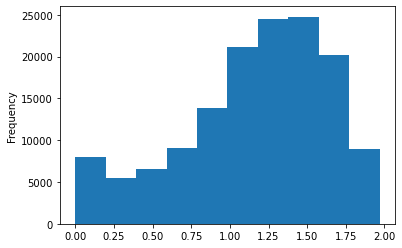

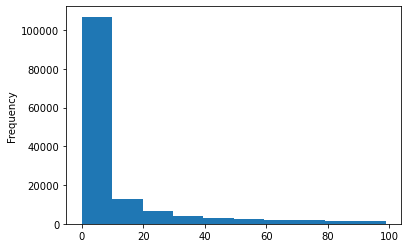

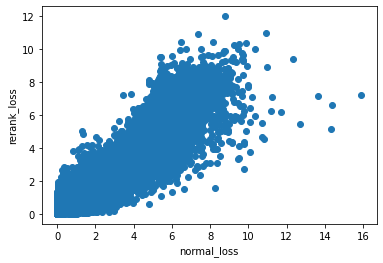

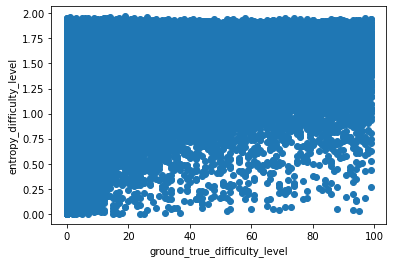

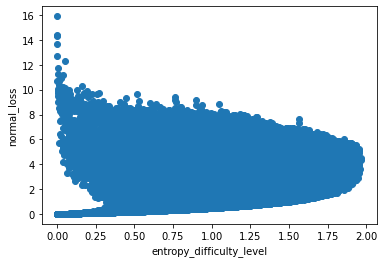

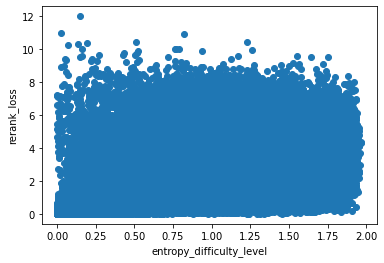

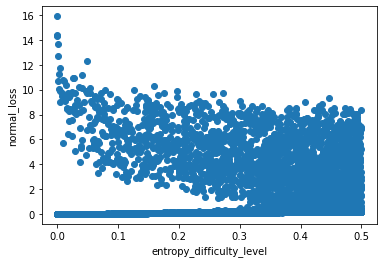

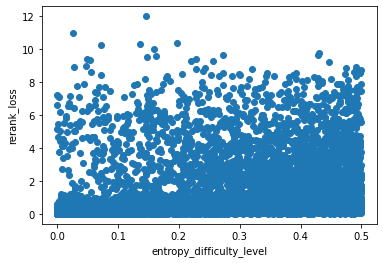

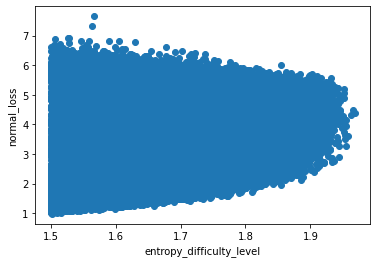

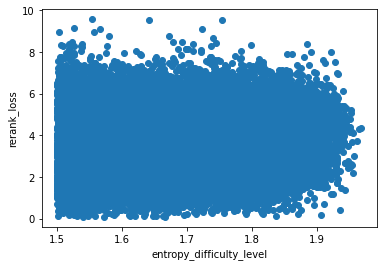

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.5737351289760331
avg rerank_loss: 0.6107281336590225

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 1.4998222881250107
avg rerank_loss: 1.5235198705992605

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 2.0467578034833593
avg rerank_loss: 2.060641818665486

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 2.4005858496070007
avg rerank_loss: 2.394824340076198

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 2.6797973425692114
avg rerank_loss: 2.6583872471793195

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 2.9290264930629695
avg rerank_loss: 2.907675152736307

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 3.1522478103528897
avg rerank_loss: 3.112123477371157

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 3.4140068655601508
avg rerank_loss: 3.3603446832636066

For Decile_for_entropy_difficulty_level of  8
avg no

In [256]:
fine_grained_evaluation = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates_canNUM100/50000/fg_eval.pkl")

fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')
plt.show()
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')
plt.show()
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.5]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.5]

plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
    
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=100):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()

# Compare different training step's results for baseline_wiki2021 
#### only for candidate num = 5, in 10000, 30000, 50000 and 60000 step

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation_10000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/10000/fg_eval.pkl")
fine_grained_evaluation_30000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/30000/fg_eval.pkl")
fine_grained_evaluation_50000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/50000/fg_eval.pkl")
fine_grained_evaluation_60000 = pd.read_pickle("results/baseline_wiki2021/exclude_cases_label_not_in_candidates/60000/fg_eval.pkl")

#### you can see the details by double click figures below

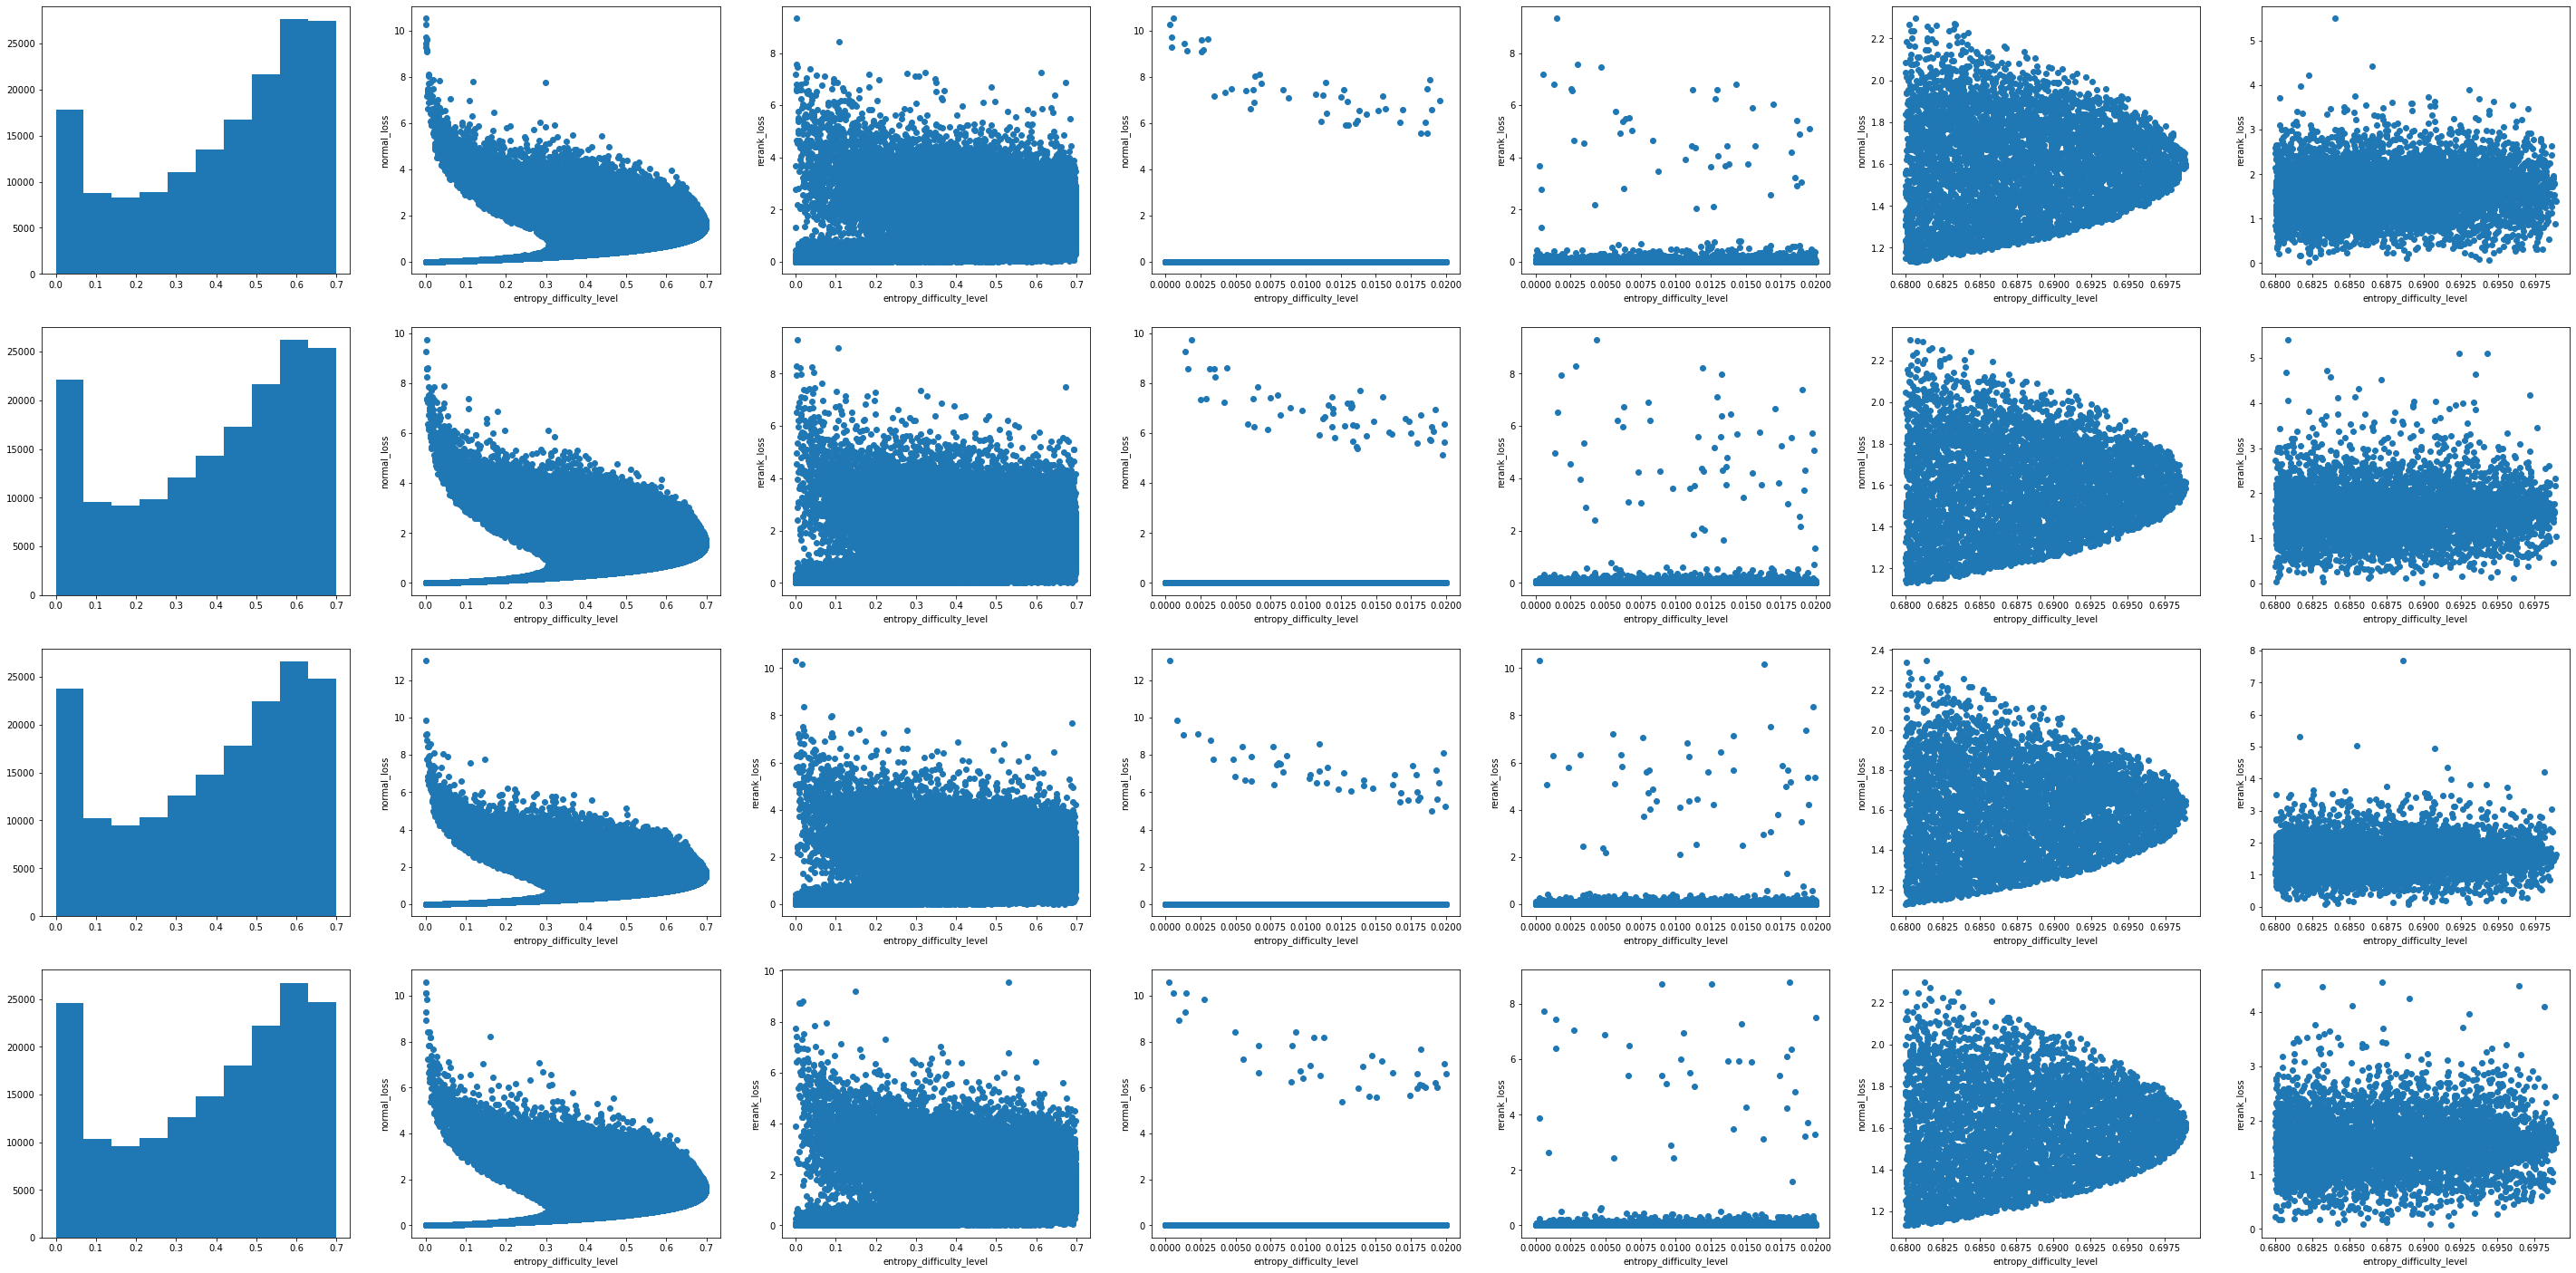

In [241]:
fig, ax = plt.subplots(nrows=4, ncols=7,figsize=(50,25))

count = 0
for tmp_df in [fine_grained_evaluation_10000, fine_grained_evaluation_30000, fine_grained_evaluation_50000, fine_grained_evaluation_60000]: 
    ax[count][0].hist(tmp_df['entropy_difficulty_level'])
    ax[count][1].scatter(tmp_df['entropy_difficulty_level'], tmp_df['normal_loss'])
    ax[count][1].set_xlabel("entropy_difficulty_level")
    ax[count][1].set_ylabel("normal_loss")
    ax[count][2].scatter(tmp_df['entropy_difficulty_level'], tmp_df['rerank_loss'])
    ax[count][2].set_xlabel("entropy_difficulty_level")
    ax[count][2].set_ylabel("rerank_loss")
    
    very_easy_cases = tmp_df[tmp_df["entropy_difficulty_level"] < 0.02]    
    ax[count][3].scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
    ax[count][3].set_xlabel("entropy_difficulty_level")
    ax[count][3].set_ylabel("normal_loss")
    ax[count][4].scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
    ax[count][4].set_xlabel("entropy_difficulty_level")
    ax[count][4].set_ylabel("rerank_loss")

    very_hard_cases = tmp_df[tmp_df["entropy_difficulty_level"] > 0.68]
    ax[count][5].scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
    ax[count][5].set_xlabel("entropy_difficulty_level")
    ax[count][5].set_ylabel("normal_loss")
    ax[count][6].scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
    ax[count][6].set_xlabel("entropy_difficulty_level")
    ax[count][6].set_ylabel("rerank_loss")
    
    count += 1

In [242]:
import pandas as pd 
import numpy as np 

fine_grained_evaluation_10000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_10000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_30000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_30000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_50000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_50000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
fine_grained_evaluation_60000["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_60000['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level_10000 = fine_grained_evaluation_10000[fine_grained_evaluation_10000['Decile_for_entropy_difficulty_level'] == i]
    this_level_30000 = fine_grained_evaluation_30000[fine_grained_evaluation_30000['Decile_for_entropy_difficulty_level'] == i]
    this_level_50000 = fine_grained_evaluation_50000[fine_grained_evaluation_50000['Decile_for_entropy_difficulty_level'] == i]
    this_level_60000 = fine_grained_evaluation_60000[fine_grained_evaluation_60000['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss for 10000, 30000, 50000, 60000 is ", 
          this_level_10000['normal_loss'].mean(),
          this_level_30000['normal_loss'].mean(),
          this_level_50000['normal_loss'].mean(),
          this_level_60000['normal_loss'].mean())
    print("avg rerank_loss for 10000, 30000, 50000, 60000 is ", 
          this_level_10000['rerank_loss'].mean(),
          this_level_30000['rerank_loss'].mean(),
          this_level_50000['rerank_loss'].mean(),
          this_level_60000['rerank_loss'].mean())
    print()

For Decile_for_entropy_difficulty_level of  0
avg normal_loss for 10000, 30000, 50000, 60000 is  0.08627132408451704 0.05315141818381903 0.03918272797633588 0.03654110978533352
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.09523991754704442 0.05734437385518324 0.04517340774790445 0.04217339204215009

For Decile_for_entropy_difficulty_level of  1
avg normal_loss for 10000, 30000, 50000, 60000 is  0.3324111822522964 0.25671811797996497 0.23170358263661253 0.2095394732421486
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.3602228481227062 0.26830387156579666 0.23985891607437962 0.21814372434632082

For Decile_for_entropy_difficulty_level of  2
avg normal_loss for 10000, 30000, 50000, 60000 is  0.6057671960005164 0.5373987150858941 0.4964331393952196 0.48832271644225794
avg rerank_loss for 10000, 30000, 50000, 60000 is  0.6339608725456972 0.5461941692065246 0.5019780394656271 0.4927083792376779

For Decile_for_entropy_difficulty_level of  3
avg normal_loss for 10000, 30000, 500

In [243]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation_10000['noraml_prediction_gt_rank'] = fine_grained_evaluation_10000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_10000['rerank_prediction_gt_rank'] = fine_grained_evaluation_10000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_30000['noraml_prediction_gt_rank'] = fine_grained_evaluation_30000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_30000['rerank_prediction_gt_rank'] = fine_grained_evaluation_30000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_50000['noraml_prediction_gt_rank'] = fine_grained_evaluation_50000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_50000['rerank_prediction_gt_rank'] = fine_grained_evaluation_50000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_60000['noraml_prediction_gt_rank'] = fine_grained_evaluation_60000[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_60000['rerank_prediction_gt_rank'] = fine_grained_evaluation_60000[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)


print("normal MRR for 10000, 30000, 50000, 60000 is ", 
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_10000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_30000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_50000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_60000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
print("rerank MRR for 10000, 30000, 50000, 60000 is ", 
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_10000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_30000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_50000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
      mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_60000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
print()


For all evaluation data:
normal MRR for 10000, 30000, 50000, 60000 is  0.7733668533002456 0.7832853003009275 0.7877406193668918 0.7893616532589159
rerank MRR for 10000, 30000, 50000, 60000 is  0.7742804730245546 0.7856795928230891 0.7906672302187432 0.7923585391389564



In [244]:
for i in range(10):
    this_level_10000 = fine_grained_evaluation_10000[fine_grained_evaluation_10000['Decile_for_entropy_difficulty_level'] == i]
    this_level_30000 = fine_grained_evaluation_30000[fine_grained_evaluation_30000['Decile_for_entropy_difficulty_level'] == i]
    this_level_50000 = fine_grained_evaluation_50000[fine_grained_evaluation_50000['Decile_for_entropy_difficulty_level'] == i]
    this_level_60000 = fine_grained_evaluation_60000[fine_grained_evaluation_60000['Decile_for_entropy_difficulty_level'] == i]
    
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR for 10000, 30000, 50000, 6000 is ", 
          mean_reciprocal_rank(gt_ranks=this_level_10000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_30000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_50000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_60000['noraml_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print("rerank MRR for 10000, 30000, 50000, 6000 is ", 
          mean_reciprocal_rank(gt_ranks=this_level_10000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_30000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_50000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5),
          mean_reciprocal_rank(gt_ranks=this_level_60000['rerank_prediction_gt_rank'].tolist(), CAN_NUM=5))
    print()

For Decile_for_entropy_difficulty_level of  0
normal MRR for 10000, 30000, 50000, 6000 is  0.991772633744856 0.9952436356404136 0.9966564381658175 0.9969309830041341
rerank MRR for 10000, 30000, 50000, 6000 is  0.9919084362139918 0.9953182179793159 0.9967394241161032 0.9968793063849335

For Decile_for_entropy_difficulty_level of  1
normal MRR for 10000, 30000, 50000, 6000 is  0.9569922011646809 0.9691160968235973 0.9727163067183912 0.9757622739018089
rerank MRR for 10000, 30000, 50000, 6000 is  0.9571732823013767 0.9693507965869086 0.9731341555208153 0.9761661403005073

For Decile_for_entropy_difficulty_level of  2
normal MRR for 10000, 30000, 50000, 6000 is  0.9037924151696607 0.9182906696899178 0.9261169976646788 0.928294573643411
rerank MRR for 10000, 30000, 50000, 6000 is  0.904087700886886 0.9186735485410824 0.9267085480477872 0.9288975021533162

For Decile_for_entropy_difficulty_level of  3
normal MRR for 10000, 30000, 50000, 6000 is  0.8392946066629627 0.85701414165523 0.8648486